In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021


In [2]:
from sklearn.ensemble import RandomForestRegressor
from Modelling import modelling
import matplotlib.pyplot as plt
from DataPrep.ImportData import importer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [3]:
df = importer().LagCreation()

In [4]:
df.columns

Index(['Start Date', 'Label', 'Charging Time (mins)', 'Energy (kWh)',
       'Total Duration (mins)', 'Port Number', 'CenterLon', 'CenterLat',
       'Level 1', 'Level 2', '# Professional & Other Places', '# Food',
       '# Shop & Service', '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event', 'Cluster_0.0', 'Cluster_1.0',
       'Cluster_2.0', 'Cluster_3.0', 'Cluster_4.0', 'Cluster_5.0',
       'Cluster_6.0', 'Cluster_7.0', 'Month_Day_1', 'Month_Day_2',
       'Month_Day_3', 'Month_Day_4', 'Month_Day_5', 'Month_Day_6',
       'Month_Day_7', 'Month_Day_8', 'Month_Day_9', 'Month_Day_10',
       'Month_Day_11', 'Month_Day_12', 'Month_Day_13', 'Month_Day_14',
       'Month_Day_15', 'Month_Day_16', 'Month_Day_17', 'Month_Day_18',
       'Month_Day_19', 'Month_Day_20', 'Month_Day_21', 'Month_Day_22',
       'Month_Day_23', 'Month_Day_24', 'Month_Day_25', 'Month_Day_26',
       'Mont

In [5]:
X = df[['Energy (kWh)_lag1', 'Energy (kWh)_lag2',
       'Energy (kWh)_lag3', 'Energy (kWh)_lag4', 'Energy (kWh)_lag5']]
y = df["Energy (kWh)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
#X_train = X_train.drop(columns="Start Date").fillna(0)
#X_test = X_test.drop(columns="Start Date").fillna(0)
model = RandomForestRegressor()
model_fit = model.fit(X_train, y_train)

In [8]:
y_pred = model_fit.predict(X_test)

In [9]:
print("\nRMSE=%f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("r^2=%f" % r2_score(y_test, y_pred))


RMSE=0.414472
r^2=0.563740


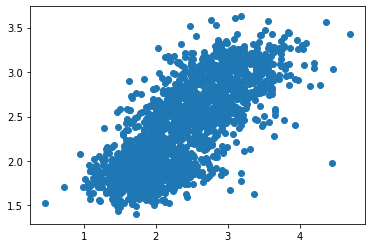

In [10]:
plt.scatter(y_test,y_pred)
plt.show()

In [11]:

X_train.columns

Index(['Energy (kWh)_lag1', 'Energy (kWh)_lag2', 'Energy (kWh)_lag3',
       'Energy (kWh)_lag4', 'Energy (kWh)_lag5'],
      dtype='object')